In [87]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("./data/titanic/train.csv")
test_df = pd.read_csv("./data/titanic/test.csv")

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
irrelevant_columns = ["PassengerId","Name","Ticket","Cabin","Embarked"]
cols_in = ["Pclass","Sex","Age","SibSp","Parch","Fare"]
cols_out = ["Survived"]

In [29]:
relevant_data = df.drop(irrelevant_columns,axis=1)
relevant_test = test_df.drop(irrelevant_columns,axis=1)

In [30]:
relevant_data.head(n=5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [31]:
le = LabelEncoder()

relevant_data["Sex"] = le.fit_transform(relevant_data["Sex"])
relevant_test["Sex"] = le.fit_transform(relevant_test["Sex"])

In [32]:
relevant_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [33]:
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(5)
memory usage: 48.8 KB


In [34]:
relevant_data["Age"] = relevant_data["Age"].fillna(relevant_data["Age"].mean())

In [35]:
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(5)
memory usage: 48.8 KB


In [36]:
relevant_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass    418 non-null int64
Sex       418 non-null int64
Age       332 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      417 non-null float64
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


In [37]:
relevant_test["Age"] = relevant_test["Age"].fillna(relevant_test["Age"].mean())
relevant_test["Fare"] = relevant_test["Fare"].fillna(relevant_test["Fare"].mean())

In [38]:
relevant_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass    418 non-null int64
Sex       418 non-null int64
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


In [41]:
split = int(0.8*relevant_data.shape[0])
train = relevant_data[:split]
test = relevant_data[split:]
test = test.reset_index(drop=True)

In [42]:
print(train.shape,test.shape)

(712, 7) (179, 7)


In [43]:
XT = train[cols_in]
YT = train[cols_out]
Xt = test[cols_in]
Yt = test[cols_out]

In [44]:
Yt_arr = Yt.values
Yt_arr = Yt_arr.reshape((-1,))
print(Yt_arr)

[1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0
 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0
 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0]


# Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier as DT

In [48]:
dt = DT(criterion='entropy',max_depth=6)

In [49]:
dt.fit(XT,YT)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
Yt_ = dt.predict(Xt)
print(Yt_)

[0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0
 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0]


In [54]:
acc = np.sum((Yt_arr==Yt_))/float(Yt.shape[0])
print(acc)

0.8491620111731844


In [55]:
dt.score(Xt,Yt)

0.8491620111731844

# Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
cnf_matrix = confusion_matrix(Yt_arr,Yt_)

In [58]:
print(cnf_matrix)

[[104  11]
 [ 16  48]]


# Predictions

In [61]:
pred = dt.predict(relevant_test)
print(pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 1 0 1 0 0 0]


In [62]:
print(pred.shape)

(418,)


In [63]:
results = {
    'PassengerId': np.array([ i for i in range(892,1310) ]),
    'Survived': pred
}

In [64]:
test_result = pd.DataFrame(results, columns=['PassengerId','Survived'])
print(test_result.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [65]:
export_csv = test_result.to_csv('./titanicPredictions.csv', index=None, header=True)

# Improving the accuracy using Random Forests

In [116]:
from sklearn.ensemble import RandomForestClassifier as RF

In [117]:
forest = RF(n_estimators=10,criterion='entropy',max_depth=6)

In [118]:
forest.fit(XT,YT)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [119]:
forest.score(XT,YT)

0.8665730337078652

In [120]:
forest.score(Xt,Yt)

0.8491620111731844

## Choosing Correct Number of Estimators

In [121]:
YT = np.array(YT).reshape((-1,))
Yt = np.array(Yt).reshape((-1,))

In [122]:
accuracy = []
for i in range(1,50):
    acc = cross_val_score(RF(n_estimators=i,criterion='entropy',max_depth=6),XT,YT,cv=5).mean()
    accuracy.append(acc)

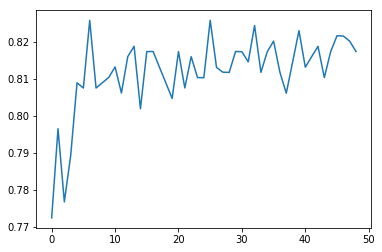

In [123]:
plt.plot(accuracy)
plt.show()

In [124]:
best_estimator = np.argmax(accuracy) + 1 # due to indexing
best_estimator

26

In [125]:
forest = RF(n_estimators=best_estimator,criterion='entropy',max_depth=6)

In [126]:
forest.fit(XT,YT)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=26, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [127]:
forest.score(XT,YT)

0.8721910112359551

In [128]:
forest.score(Xt,Yt)

0.8603351955307262

In [129]:
Yt_f = forest.predict(Xt)

In [130]:
cnf_forest = confusion_matrix(Yt_arr,Yt_f)
print(cnf_forest)

[[105  10]
 [ 15  49]]


# Predictions

In [131]:
pred = forest.predict(relevant_test)
print(pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [132]:
print(pred.shape)

(418,)


In [133]:
results = {
    'PassengerId': np.array([ i for i in range(892,1310) ]),
    'Survived': pred
}

In [134]:
test_result = pd.DataFrame(results, columns=['PassengerId','Survived'])
print(test_result.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [135]:
export_csv = test_result.to_csv('./titanic_random_forest.csv', index=None, header=True)